<a href="https://colab.research.google.com/github/M-102/data-analysis/blob/main/lab4_last_semak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [5]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, train_size = 60000, random_state = 123)


In [8]:
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


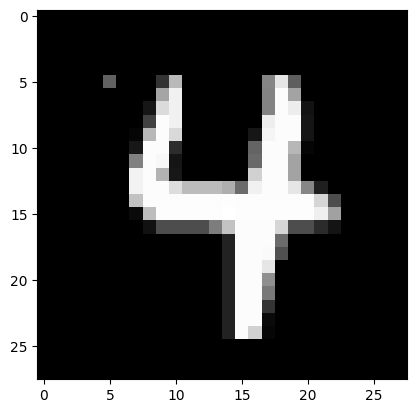

4


In [12]:
# вывод изображения
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.show()
# вывод метки для этого изображения
print (y_train[123])


In [15]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)


Shape of transformed X train: (60000, 784)


In [17]:
!pip or !apt

ERROR: unknown command "or"


In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]



Shape of transformed y train: (60000, 10)


In [19]:
from keras.models import Sequential #последовательный
from keras.layers import Dense #полносвязный слой нейронов

In [20]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()

# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation = 'sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=100, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=num_classes, activation='softmax'))
# 5. компилируем модель
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2527 - loss: 2.2489 - val_accuracy: 0.5375 - val_loss: 1.9540
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6253 - loss: 1.7720 - val_accuracy: 0.6908 - val_loss: 1.2391
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7401 - loss: 1.1122 - val_accuracy: 0.7903 - val_loss: 0.8428
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8044 - loss: 0.7871 - val_accuracy: 0.8278 - val_loss: 0.6552
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8387 - loss: 0.6217 - val_accuracy: 0.8568 - val_loss: 0.5506
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8649 - loss: 0.5288 - val_accuracy: 0.8695 - val_loss: 0.4846
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8746 - loss: 0.4681 - val_accuracy: 0.8817 - val_loss: 0.4407
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8849 - loss:

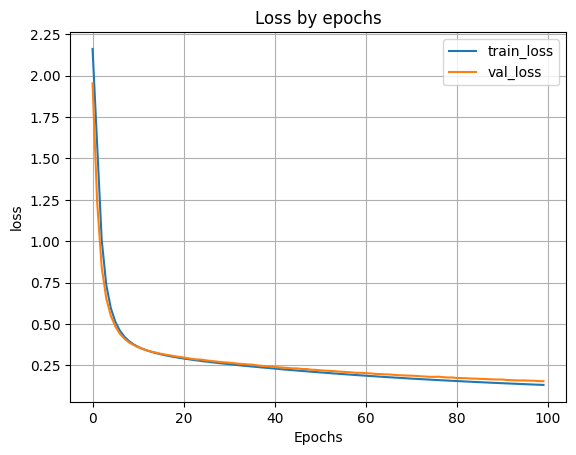

In [25]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [26]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1535
Loss on test data: 0.14811129868030548
Accuracy on test data: 0.9556000232696533


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
NN output: [[5.1078003e-10 9.9660718e-01 6.7305693e-05 9.7991386e-04 2.6646219e-05
  2.2447057e-05 1.7519755e-05 1.7363012e-03 7.9617930e-05 4.6303307e-04]]


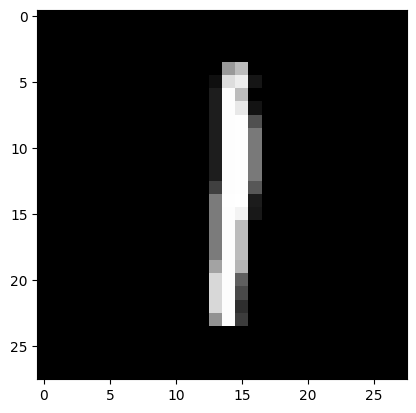

Real mark:  1
NN answer:  1


In [27]:
# вывод тестового изображения и результата распознавания
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))


In [30]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('Для нейронки бра.png')
file_data = file_data.convert('L')
# перевод в градации серого
test_img = np.array(file_data)


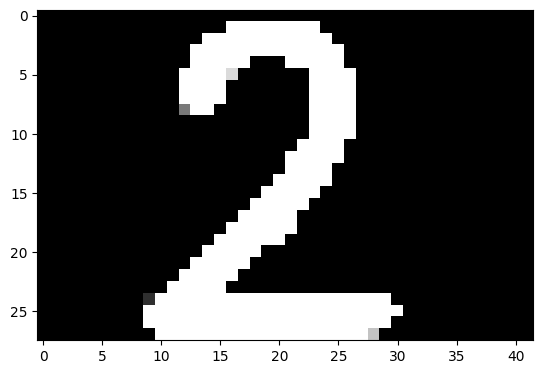

ValueError: cannot reshape array of size 1176 into shape (1,784)

In [31]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()

# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)

# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))


Отобразил и ладно :)